In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

Executing op _MklMatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Настройки для красивых графиков
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
# Увеличим стандартный размер графиков
plt.rcParams['figure.figsize'] = (15, 7)

In [2]:
# Определяем пути к данным. Предполагается, что ноутбук в папке `notebooks`
# и данные лежат в `data/raw/` относительно корня проекта.
# Если структура другая, поправьте пути.
try:
    candles_path = '../data/raw/train_candles.csv'
    if not os.path.exists(candles_path):
        # Альтернативный путь, если запускаем из корня проекта
        candles_path = 'data/raw/train_candles.csv'
        
    df_candles = pd.read_csv(candles_path)
    # Сразу преобразуем дату в нужный формат
    df_candles['begin'] = pd.to_datetime(df_candles['begin'])
    print("Данные о свечах успешно загружены.")
except FileNotFoundError:
    print(f"Ошибка: Файл {candles_path} не найден. Проверьте путь к данным.")

df_candles.info()

Данные о свечах успешно загружены.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23118 entries, 0 to 23117
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   open                  23118 non-null  float64       
 1   close                 23118 non-null  float64       
 2   high                  23118 non-null  float64       
 3   low                   23118 non-null  float64       
 4   volume                23118 non-null  int64         
 5   begin                 23118 non-null  datetime64[ns]
 6   ticker                23118 non-null  object        
 7   target_return_1d      23118 non-null  float64       
 8   target_direction_1d   23118 non-null  int64         
 9   target_return_20d     23118 non-null  float64       
 10  target_direction_20d  23118 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 1.9+ MB


In [3]:
print("Первые 5 строк данных:")
display(df_candles.head())

print("\nОсновные статистические показатели:")
# Описываем только числовые колонки
display(df_candles.describe())

print(f"\nКоличество пропущенных значений в каждой колонке:\n{df_candles.isnull().sum()}")

Первые 5 строк данных:


,open,close,high,low,volume,begin,ticker,target_return_1d,target_direction_1d,target_return_20d,target_direction_20d
0,81.50,81.70,83.20,81.16,29755530,2020-06-19,AFLT,0.004896,1,0.071726,1
1,81.72,82.10,83.98,80.26,18502950,2020-06-22,AFLT,-0.010962,0,0.048477,1
2,82.04,81.20,82.48,80.40,16848930,2020-06-23,AFLT,-0.007635,0,0.048522,1
3,79.78,80.58,80.80,78.22,21559860,2020-06-25,AFLT,-0.014892,0,0.096550,1
4,80.50,79.38,81.44,78.76,14677280,2020-06-26,AFLT,0.044344,1,0.104056,1



Основные статистические показатели:


,open,close,high,low,volume,begin,target_return_1d,target_direction_1d,target_return_20d,target_direction_20d
count,23118.000000,23118.000000,23118.000000,23118.000000,2.311800e+04,23118,23118.000000,23118.000000,23118.000000,23118.000000
mean,1404.472617,1403.720216,1423.288621,1382.346488,3.538146e+09,2022-11-29 01:15:55.826628608,0.000349,0.493209,0.007303,0.521498
min,21.900000,22.440000,23.280000,21.440000,2.231000e+03,2020-06-19 00:00:00,-0.412538,0.000000,-0.610849,0.000000
25%,116.643750,116.550000,118.135000,114.821250,5.073948e+05,2021-08-31 00:00:00,-0.009611,0.000000,-0.047851,0.000000
50%,311.130000,311.325000,314.700000,308.015000,2.971295e+06,2022-12-08 00:00:00,-0.000053,0.000000,0.004649,1.000000
75%,1471.625000,1471.750000,1492.300000,1449.550000,1.806571e+07,2024-02-19 00:00:00,0.010092,1.000000,0.064566,1.000000
max,9000.000000,8908.000000,10097.000000,8500.000000,7.032681e+11,2025-04-15 00:00:00,0.333715,1.000000,0.644453,1.000000
std,2102.364091,2101.089076,2129.177425,2070.888711,2.413245e+10,NaN,0.022941,0.499965,0.103259,0.499548



Количество пропущенных значений в каждой колонке:
open                    0
close                   0
high                    0
low                     0
volume                  0
begin                   0
ticker                  0
target_return_1d        0
target_direction_1d     0
target_return_20d       0
target_direction_20d    0
dtype: int64


Всего уникальных тикеров: 19

Глубина истории по тикерам:


,min,max,count
ticker,,,
AFLT,2020-06-19,2025-04-15,1219
ALRS,2020-06-19,2025-04-15,1219
CHMF,2020-06-19,2025-04-15,1219
GAZP,2020-06-19,2025-04-15,1219
LKOH,2020-06-19,2025-04-15,1219
MAGN,2020-06-19,2025-04-15,1219
MGNT,2020-06-19,2025-04-15,1219
MTSS,2020-06-19,2025-04-15,1219
MOEX,2020-06-19,2025-04-15,1219


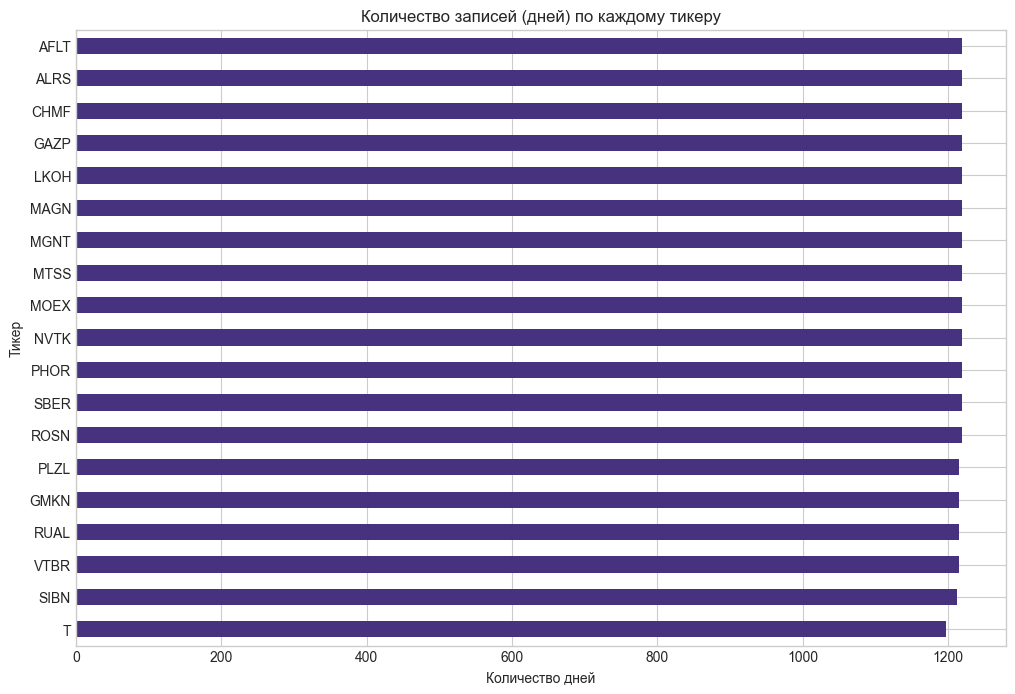

In [4]:
ticker_counts = df_candles['ticker'].value_counts()
print(f"Всего уникальных тикеров: {len(ticker_counts)}")

# Анализ глубины истории по каждому тикеру
ticker_history = df_candles.groupby('ticker')['begin'].agg(['min', 'max', 'count']).sort_values(by='count', ascending=False)

print("\nГлубина истории по тикерам:")
display(ticker_history)

# Визуализация количества записей по тикерам
plt.figure(figsize=(12, 8))
ticker_counts.plot(kind='barh')
plt.title('Количество записей (дней) по каждому тикеру')
plt.xlabel('Количество дней')
plt.ylabel('Тикер')
plt.gca().invert_yaxis() # Самый длинный тикер сверху
plt.show()

Визуализируем ряды цен закрытия для: ['AFLT', 'ALRS', 'CHMF', 'SIBN', 'T']


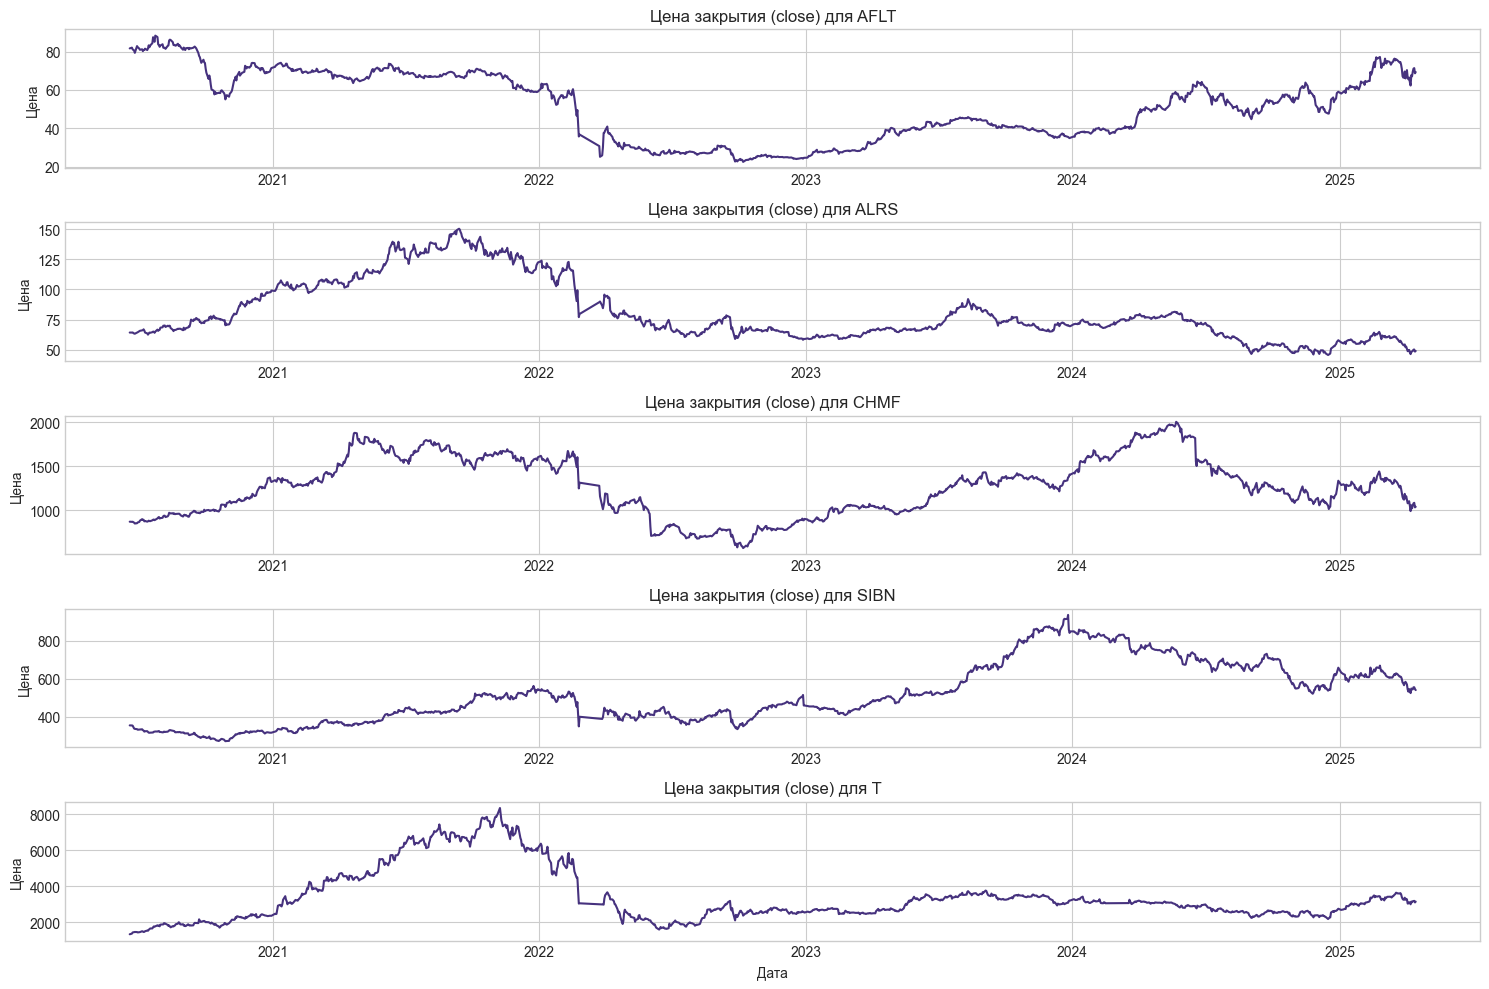

In [5]:
# Выберем несколько тикеров для визуализации (самые популярные и несколько менее популярных)
tickers_to_plot = ticker_history.head(3).index.tolist() + ticker_history.tail(2).index.tolist()

print(f"Визуализируем ряды цен закрытия для: {tickers_to_plot}")

plt.figure(figsize=(15, 10))
for i, ticker in enumerate(tickers_to_plot, 1):
    plt.subplot(len(tickers_to_plot), 1, i)
    subset = df_candles[df_candles['ticker'] == ticker]
    plt.plot(subset['begin'], subset['close'])
    plt.title(f'Цена закрытия (close) для {ticker}')
    plt.ylabel('Цена')
plt.xlabel('Дата')
plt.tight_layout()
plt.show()

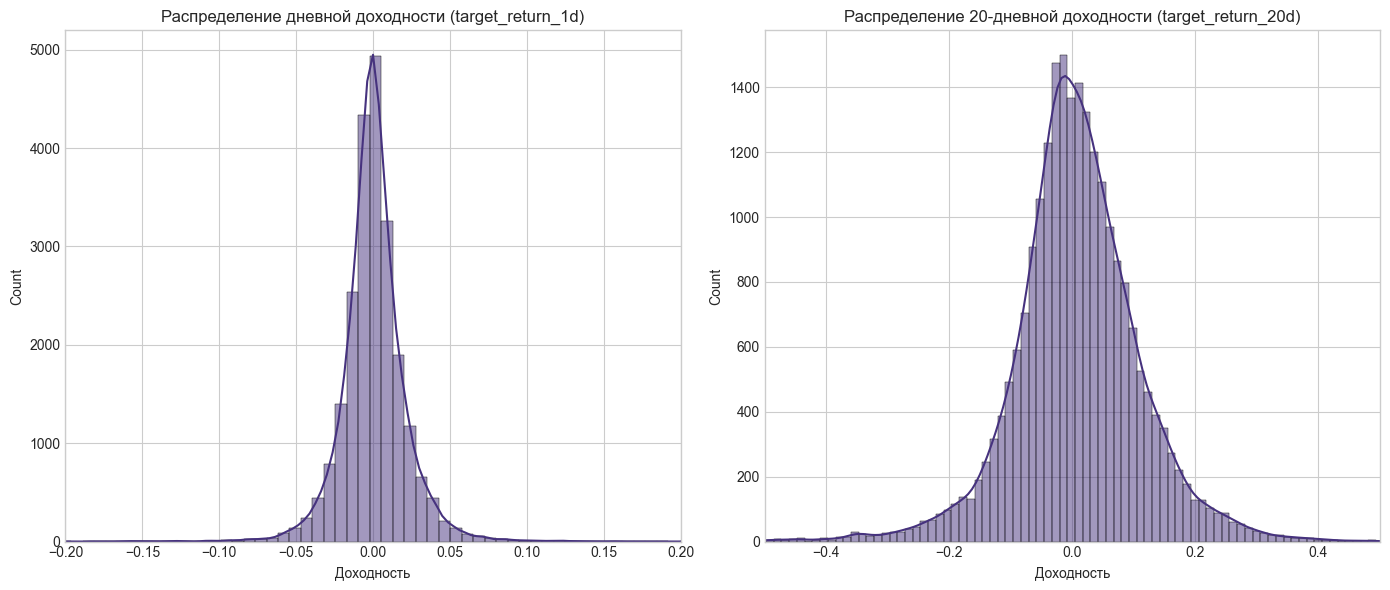

In [6]:
plt.figure(figsize=(14, 6))

# Распределение дневной доходности
plt.subplot(1, 2, 1)
sns.histplot(df_candles['target_return_1d'], bins=100, kde=True)
plt.title('Распределение дневной доходности (target_return_1d)')
plt.xlabel('Доходность')
# Ограничим x_lim для лучшей визуализации, так как могут быть сильные выбросы
plt.xlim(-0.2, 0.2)


# Распределение 20-дневной доходности
plt.subplot(1, 2, 2)
sns.histplot(df_candles['target_return_20d'], bins=100, kde=True)
plt.title('Распределение 20-дневной доходности (target_return_20d)')
plt.xlabel('Доходность')
plt.xlim(-0.5, 0.5)


plt.tight_layout()
plt.show()

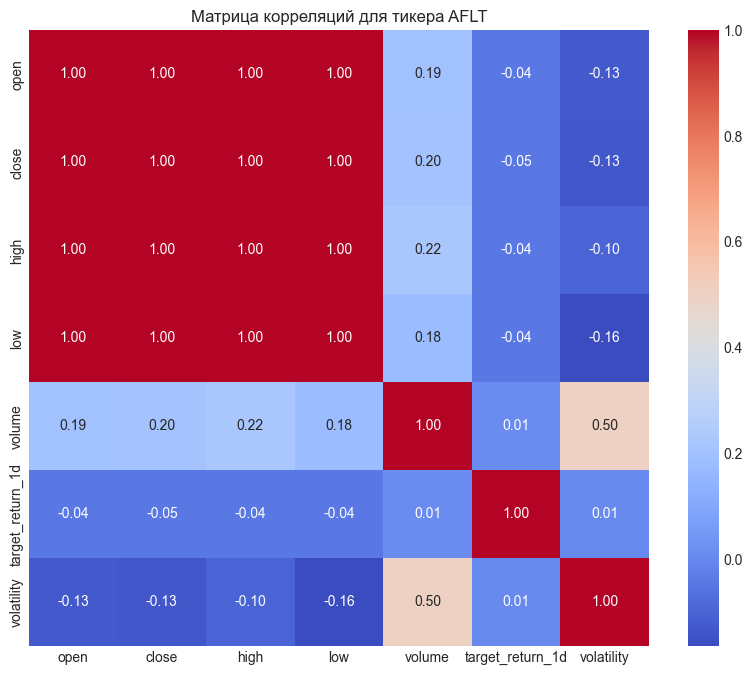

In [7]:
# Выберем один тикер для примера, например, самый популярный
sample_ticker = ticker_history.index[0]
df_sample = df_candles[df_candles['ticker'] == sample_ticker].copy()

# Рассчитаем дневную волатильность как (high - low) / close
df_sample['volatility'] = (df_sample['high'] - df_sample['low']) / df_sample['close']

corr_cols = ['open', 'close', 'high', 'low', 'volume', 'target_return_1d', 'volatility']

correlation_matrix = df_sample[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Матрица корреляций для тикера {sample_ticker}')
plt.show()

In [1]:
import pandas as pd
df = pd.read_parquet('features_news.parquet', engine='pyarrow')

In [2]:
df.columns

Index(['date', 'ticker', 'num_news', 'char_count', 'word_count',
       'avg_word_len', 'caps_count', 'sentiment_negative', 'sentiment_neutral',
       'sentiment_positive',
       ...
       'emb_302', 'emb_303', 'emb_304', 'emb_305', 'emb_306', 'emb_307',
       'emb_308', 'emb_309', 'emb_310', 'emb_311'],
      dtype='object', length=322)

In [3]:
df.describe()

,date,num_news,char_count,word_count,avg_word_len,caps_count,sentiment_negative,sentiment_neutral,sentiment_positive,emb_0,...,emb_302,emb_303,emb_304,emb_305,emb_306,emb_307,emb_308,emb_309,emb_310,emb_311
count,7177,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,...,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000
mean,2022-07-14 01:15:14.421067264,4.880173,3637.552999,499.466638,6.323404,61.284938,0.240583,0.870221,0.400195,-0.206790,...,-0.085281,-0.392759,-0.038401,0.159839,-0.048178,0.322028,-0.349617,-0.207901,-0.218020,-0.501226
min,2020-01-01 00:00:00,1.000000,106.000000,13.000000,4.530387,0.000000,0.002828,0.092044,0.004263,-1.164669,...,-0.986916,-1.353592,-0.838554,-0.903131,-0.799638,-0.580376,-1.165715,-1.523477,-0.842892,-1.150477
25%,2021-04-07 00:00:00,1.000000,1681.500000,228.000000,6.112472,14.000000,0.036293,0.831234,0.127014,-0.335371,...,-0.194404,-0.513583,-0.151627,0.058119,-0.142947,0.141468,-0.488395,-0.344533,-0.302402,-0.634244
50%,2022-03-03 00:00:00,1.000000,2576.589744,354.000000,6.331814,35.000000,0.155636,0.893078,0.392435,-0.208545,...,-0.091192,-0.397317,-0.040933,0.156346,-0.038981,0.310811,-0.342632,-0.211408,-0.214221,-0.506685
75%,2023-12-17 00:00:00,4.000000,5053.000000,691.000000,6.526760,65.000000,0.340623,0.944673,0.582336,-0.085208,...,0.018763,-0.275849,0.066129,0.263679,0.053112,0.476449,-0.215659,-0.079563,-0.134583,-0.393766
max,2025-09-06 00:00:00,64.000000,60485.000000,8423.000000,9.394309,700.000000,0.994051,0.993056,0.994850,0.710588,...,0.688037,0.998960,0.928267,0.919852,0.701630,1.341826,0.514719,0.989896,0.468076,0.477598
std,NaN,8.192151,3684.406837,507.986824,0.431352,79.766266,0.257948,0.106766,0.289651,0.212445,...,0.176083,0.210107,0.189574,0.182689,0.172886,0.274543,0.223974,0.250000,0.149636,0.199495


In [3]:
import pandas as pd

# Загружаем CSV
df = pd.read_csv("news.csv")

# Перезаписываем столбец id — просто присваиваем диапазон
df['id'] = range(1, len(df) + 1)

# Сохраняем обратно (без индекса!)
df.to_csv("news_fixed.csv", index=False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Настройка ---
# Убедитесь, что ноутбук запущен из корневой директории проекта,
# либо укажите правильный путь к файлу
file_path = Path('features_news.parquet')

# --- Загрузка ---
try:
    df_news_features = pd.read_parquet(file_path)
    print(f" Датасет успешно загружен. Форма: {df_news_features.shape}")
except FileNotFoundError:
    print(f" Файл не найден по пути: {file_path}")
    print("Убедитесь, что скрипт generate_nlp_features.py отработал успешно.")

# --- Вывод основной информации ---
if 'df_news_features' in locals():
    print("\n--- 1. Общая информация о датасете ---")
    df_news_features.info()

    print("\n--- 2. Пример данных (первые 5 строк) ---")
    display(df_news_features.head())

    print("\n--- 3. Проверка на пропуски (NaN) ---")
    print(df_news_features.isnull().sum())

 Датасет успешно загружен. Форма: (5927, 322)

--- 1. Общая информация о датасете ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5927 entries, 0 to 5926
Columns: 322 entries, date to emb_311
dtypes: datetime64[ns](1), float32(315), float64(3), int64(2), object(1)
memory usage: 7.4+ MB

--- 2. Пример данных (первые 5 строк) ---


,date,ticker,num_news,char_count,word_count,avg_word_len,caps_count,sentiment_negative,sentiment_neutral,sentiment_positive,...,emb_302,emb_303,emb_304,emb_305,emb_306,emb_307,emb_308,emb_309,emb_310,emb_311
0,2020-01-03,LKOH,1,880.0,121.0,6.280992,0,0.013433,0.773611,0.931639,...,0.152444,-0.126646,0.134500,0.090888,0.074605,0.572156,-0.529290,-0.142655,0.239184,-0.023169
1,2020-01-03,MAGN,1,1404.0,166.0,6.861446,18,0.066247,0.991820,0.050435,...,-0.256131,-0.454757,0.188746,0.476452,0.150309,0.759317,-0.211162,-0.439881,-0.232276,-0.030614
2,2020-01-04,MAGN,1,2364.0,305.0,6.737705,9,0.014078,0.795005,0.931169,...,0.442336,-0.230317,-0.476752,0.255620,-0.085596,0.262090,-0.637222,0.126310,-0.350124,-0.747800
3,2020-01-04,SIBN,1,2364.0,305.0,6.737705,9,0.014078,0.795005,0.931169,...,0.442336,-0.230317,-0.476752,0.255620,-0.085596,0.262090,-0.637222,0.126310,-0.350124,-0.747800
4,2020-01-08,GMKN,1,3980.0,605.0,5.560331,6,0.282822,0.924488,0.138137,...,0.151048,-0.144201,0.140901,-0.149687,-0.615302,0.092592,-0.610546,-0.500718,-0.079174,-0.627958



--- 3. Проверка на пропуски (NaN) ---
date          0
ticker        0
num_news      0
char_count    0
word_count    0
             ..
emb_307       0
emb_308       0
emb_309       0
emb_310       0
emb_311       0
Length: 322, dtype: int64



--- 4. Распределение ключевых NLP признаков ---


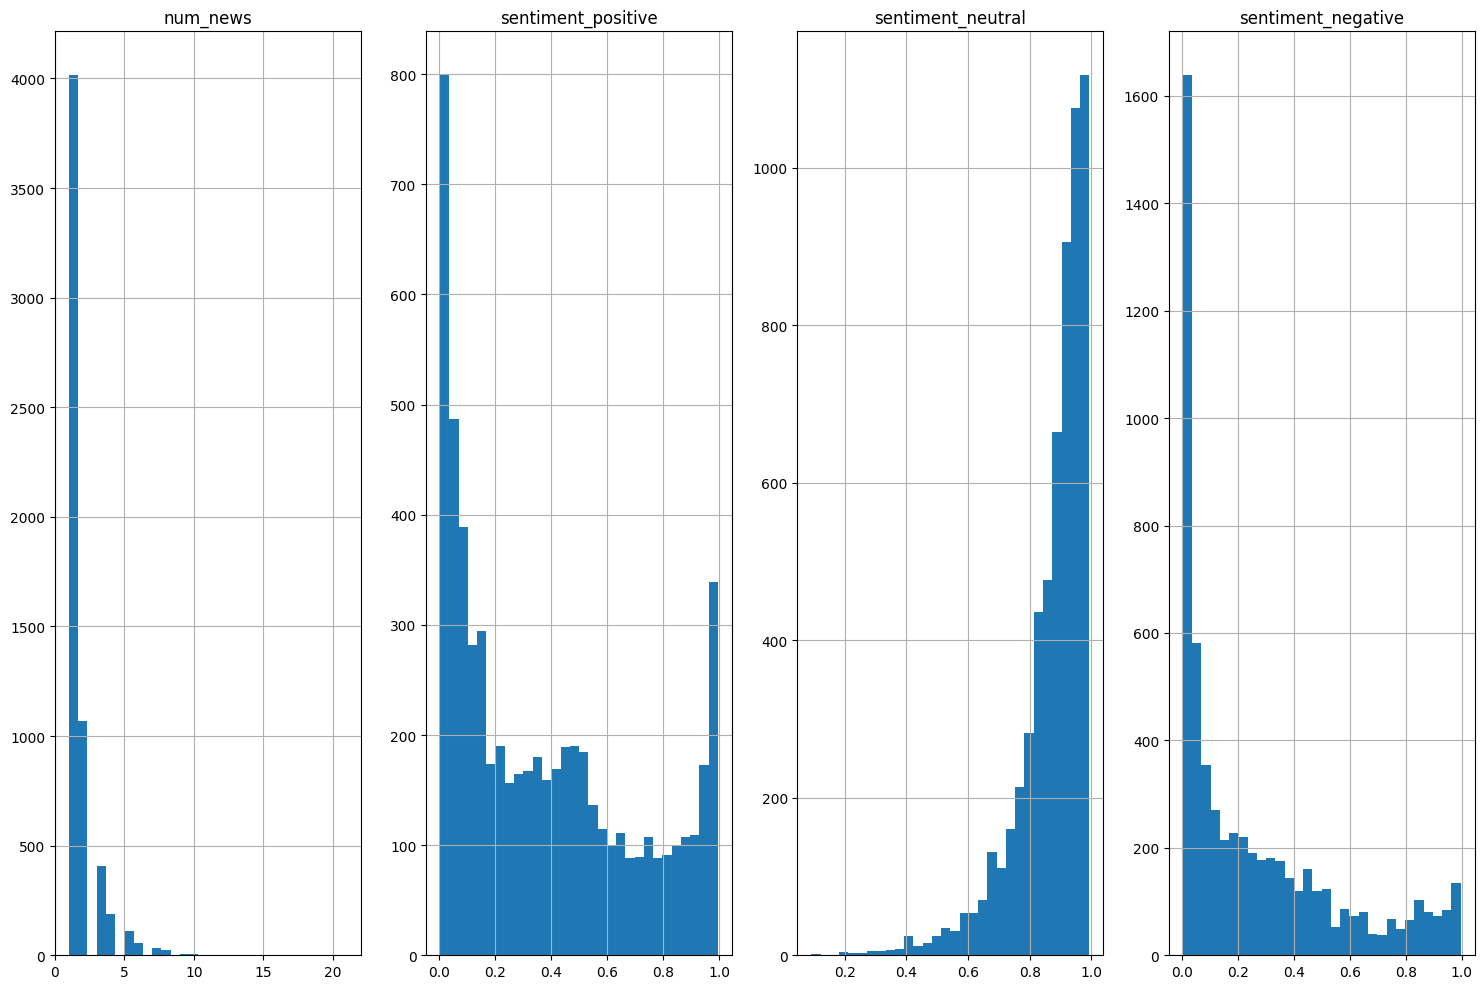


--- 5. Описательные статистики ---


,num_news,sentiment_positive,sentiment_neutral,sentiment_negative
count,5927.000000,5927.000000,5927.000000,5927.000000
mean,1.652101,0.375732,0.872337,0.264079
std,1.414490,0.315313,0.116587,0.284052
min,1.000000,0.004263,0.092044,0.002668
25%,1.000000,0.085140,0.830598,0.030114
50%,1.000000,0.305583,0.907814,0.154031
75%,2.000000,0.604825,0.953192,0.421173
max,21.000000,0.994850,0.993056,0.996127


In [2]:
# Выбираем несколько ключевых признаков для анализа
features_to_plot = [
    'num_news', 'char_count_mean', 'word_count_mean',
    'avg_word_len_mean', 'caps_count_sum', 'sentiment_positive',
    'sentiment_neutral', 'sentiment_negative'
]

# Оставляем только те колонки, которые есть в датафрейме
features_to_plot = [f for f in features_to_plot if f in df_news_features.columns]

if not features_to_plot:
    print("Не найдены колонки для построения гистограмм.")
else:
    print("\n--- 4. Распределение ключевых NLP признаков ---")
    df_news_features[features_to_plot].hist(bins=30, figsize=(15, 10), layout=(-1, 4))
    plt.tight_layout()
    plt.show()

    print("\n--- 5. Описательные статистики ---")
    display(df_news_features[features_to_plot].describe())


--- 6. Активность по тикерам (топ-15 по количеству новостных дней) ---
ticker
ROSN    2770
MAGN    1813
T        956
SBER     915
SIBN     771
GMKN     326
GAZP     318
MTSS     288
NVTK     209
LKOH     204
ALRS     191
PLZL     179
MOEX     174
CHMF     131
VTBR     124
Name: num_news, dtype: int64


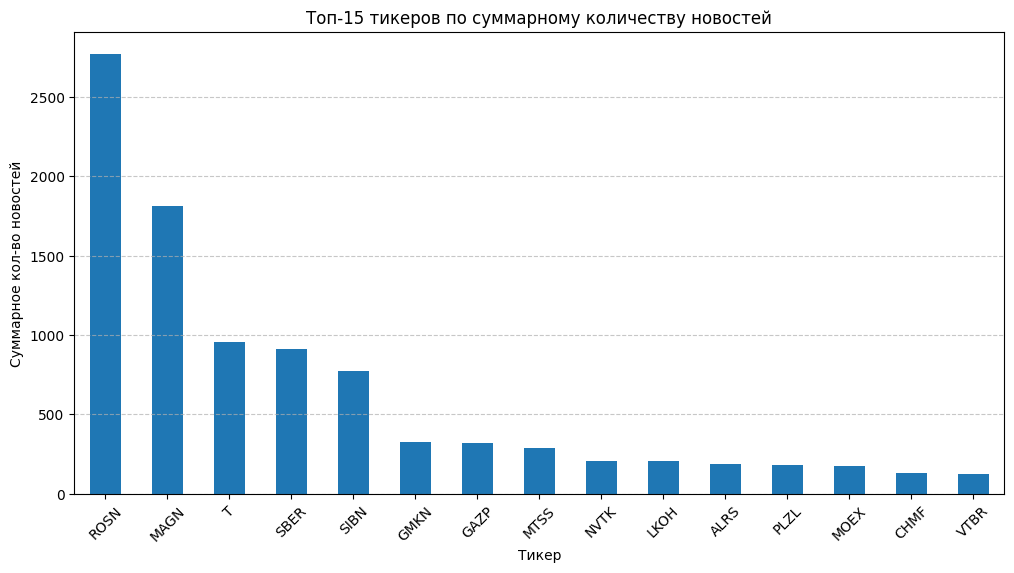


--- 7. Динамика количества новостей во времени ---


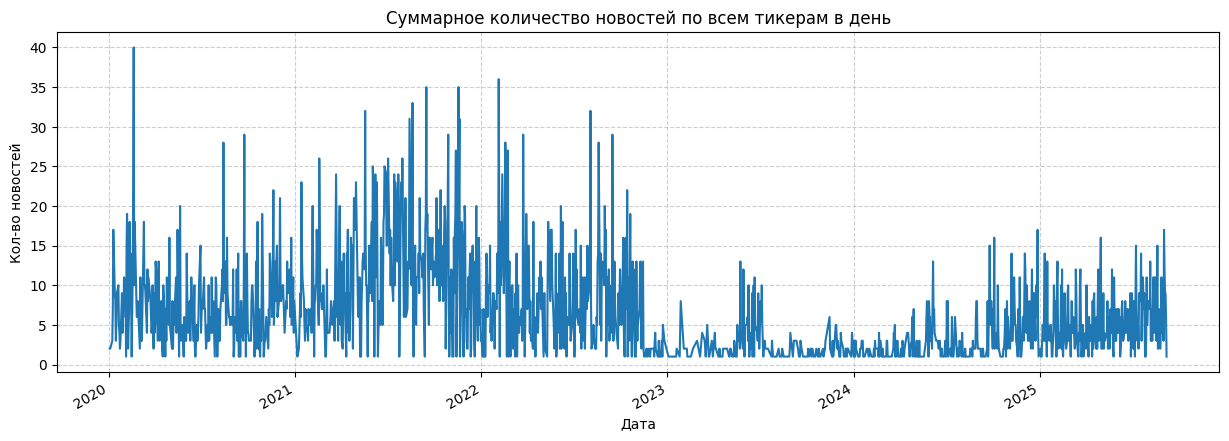

In [3]:
print("\n--- 6. Активность по тикерам (топ-15 по количеству новостных дней) ---")
ticker_activity = df_news_features.groupby('ticker')['num_news'].sum().sort_values(ascending=False)
print(ticker_activity.head(15))

plt.figure(figsize=(12, 6))
ticker_activity.head(15).plot(kind='bar')
plt.title('Топ-15 тикеров по суммарному количеству новостей')
plt.ylabel('Суммарное кол-во новостей')
plt.xlabel('Тикер')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n--- 7. Динамика количества новостей во времени ---")
news_over_time = df_news_features.groupby('date')['num_news'].sum()

plt.figure(figsize=(15, 5))
news_over_time.plot()
plt.title('Суммарное количество новостей по всем тикерам в день')
plt.ylabel('Кол-во новостей')
plt.xlabel('Дата')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


--- 8. Матрица корреляций ---


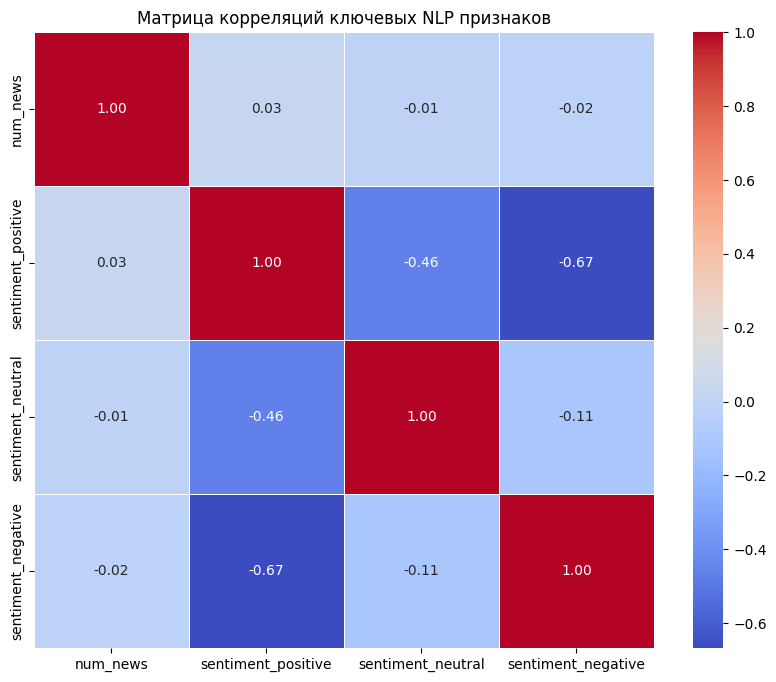

In [4]:
# Используем те же признаки, что и для гистограмм
if features_to_plot:
    print("\n--- 8. Матрица корреляций ---")
    
    correlation_matrix = df_news_features[features_to_plot].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Матрица корреляций ключевых NLP признаков')
    plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Настройка ---
# Убедитесь, что ноутбук запущен из корневой директории проекта
# или укажите правильный путь к файлу
pd.set_option('display.max_columns', None) # Показываем все колонки
file_path = Path('inference_data.parquet')

# --- Загрузка ---
try:
    df = pd.read_parquet(file_path)
    print(f" Финальный датасет успешно загружен. Форма: {df.shape}")
except FileNotFoundError:
    print(f" Файл не найден по пути: {file_path}")
    print("Убедитесь, что скрипт prepare_final_dataset.py отработал успешно.")

# --- Вывод основной информации ---
if 'df' in locals():
    print("\n--- 1. Общая информация ---")
    df.info(verbose=False) # verbose=False для краткости, если много колонок

    print("\n--- 2. Пример данных ---")
    display(df.head())

    print("\n--- 3. Проверка на пропуски (NaN) ---")
    # После нашего пайплайна здесь должно быть 0
    nan_sum = df.isnull().sum().sum()
    print(f"Общее количество пропущенных значений: {nan_sum}")
    if nan_sum > 0:
        print("ВНИМАНИЕ: Обнаружены пропуски! Нужно исследовать.")

 Финальный датасет успешно загружен. Форма: (380, 368)

--- 1. Общая информация ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 368 entries, open to target_return_20d
dtypes: datetime64[ns](1), float32(315), float64(46), int32(3), int64(2), object(1)
memory usage: 620.6+ KB

--- 2. Пример данных ---


,open,close,high,low,volume,date,ticker,day_of_week,week_of_year,month,day_of_year,log_return_1d,volatility_20d,atr_14,rsi_14,macd_hist,sma_50,dist_from_sma_50,bb_upper,bb_lower,bb_width,volume_change_1d,volume_sma_20,volume_vs_sma20,log_return_lag_1,log_return_lag_2,log_return_lag_3,log_return_lag_5,log_return_lag_10,nlp_sentiment_negative,nlp_sentiment_neutral,nlp_sentiment_positive,nlp_emb_0,nlp_emb_1,nlp_emb_2,nlp_emb_3,nlp_emb_4,nlp_emb_5,nlp_emb_6,nlp_emb_7,nlp_emb_8,nlp_emb_9,nlp_emb_10,nlp_emb_11,nlp_emb_12,nlp_emb_13,nlp_emb_14,nlp_emb_15,nlp_emb_16,nlp_emb_17,nlp_emb_18,nlp_emb_19,nlp_emb_20,nlp_emb_21,nlp_emb_22,nlp_emb_23,nlp_emb_24,nlp_emb_25,nlp_emb_26,nlp_emb_27,nlp_emb_28,nlp_emb_29,nlp_emb_30,nlp_emb_31,nlp_emb_32,nlp_emb_33,nlp_emb_34,nlp_emb_35,nlp_emb_36,nlp_emb_37,nlp_emb_38,nlp_emb_39,nlp_emb_40,nlp_emb_41,nlp_emb_42,nlp_emb_43,nlp_emb_44,nlp_emb_45,nlp_emb_46,nlp_emb_47,nlp_emb_48,nlp_emb_49,nlp_emb_50,nlp_emb_51,nlp_emb_52,nlp_emb_53,nlp_emb_54,nlp_emb_55,nlp_emb_56,nlp_emb_57,nlp_emb_58,nlp_emb_59,nlp_emb_60,nlp_emb_61,nlp_emb_62,nlp_emb_63,nlp_emb_64,nlp_emb_65,nlp_emb_66,nlp_emb_67,nlp_emb_68,nlp_emb_69,nlp_emb_70,nlp_emb_71,nlp_emb_72,nlp_emb_73,nlp_emb_74,nlp_emb_75,nlp_emb_76,nlp_emb_77,nlp_emb_78,nlp_emb_79,nlp_emb_80,nlp_emb_81,nlp_emb_82,nlp_emb_83,nlp_emb_84,nlp_emb_85,nlp_emb_86,nlp_emb_87,nlp_emb_88,nlp_emb_89,nlp_emb_90,nlp_emb_91,nlp_emb_92,nlp_emb_93,nlp_emb_94,nlp_emb_95,nlp_emb_96,nlp_emb_97,nlp_emb_98,nlp_emb_99,nlp_emb_100,nlp_emb_101,nlp_emb_102,nlp_emb_103,nlp_emb_104,nlp_emb_105,nlp_emb_106,nlp_emb_107,nlp_emb_108,nlp_emb_109,nlp_emb_110,nlp_emb_111,nlp_emb_112,nlp_emb_113,nlp_emb_114,nlp_emb_115,nlp_emb_116,nlp_emb_117,nlp_emb_118,nlp_emb_119,nlp_emb_120,nlp_emb_121,nlp_emb_122,nlp_emb_123,nlp_emb_124,nlp_emb_125,nlp_emb_126,nlp_emb_127,nlp_emb_128,nlp_emb_129,nlp_emb_130,nlp_emb_131,nlp_emb_132,nlp_emb_133,nlp_emb_134,nlp_emb_135,nlp_emb_136,nlp_emb_137,nlp_emb_138,nlp_emb_139,nlp_emb_140,nlp_emb_141,nlp_emb_142,nlp_emb_143,nlp_emb_144,nlp_emb_145,nlp_emb_146,nlp_emb_147,nlp_emb_148,nlp_emb_149,nlp_emb_150,nlp_emb_151,nlp_emb_152,nlp_emb_153,nlp_emb_154,nlp_emb_155,nlp_emb_156,nlp_emb_157,nlp_emb_158,nlp_emb_159,nlp_emb_160,nlp_emb_161,nlp_emb_162,nlp_emb_163,nlp_emb_164,nlp_emb_165,nlp_emb_166,nlp_emb_167,nlp_emb_168,nlp_emb_169,nlp_emb_170,nlp_emb_171,nlp_emb_172,nlp_emb_173,nlp_emb_174,nlp_emb_175,nlp_emb_176,nlp_emb_177,nlp_emb_178,nlp_emb_179,nlp_emb_180,nlp_emb_181,nlp_emb_182,nlp_emb_183,nlp_emb_184,nlp_emb_185,nlp_emb_186,nlp_emb_187,nlp_emb_188,nlp_emb_189,nlp_emb_190,nlp_emb_191,nlp_emb_192,nlp_emb_193,nlp_emb_194,nlp_emb_195,nlp_emb_196,nlp_emb_197,nlp_emb_198,nlp_emb_199,nlp_emb_200,nlp_emb_201,nlp_emb_202,nlp_emb_203,nlp_emb_204,nlp_emb_205,nlp_emb_206,nlp_emb_207,nlp_emb_208,nlp_emb_209,nlp_emb_210,nlp_emb_211,nlp_emb_212,nlp_emb_213,nlp_emb_214,nlp_emb_215,nlp_emb_216,nlp_emb_217,nlp_emb_218,nlp_emb_219,nlp_emb_220,nlp_emb_221,nlp_emb_222,nlp_emb_223,nlp_emb_224,nlp_emb_225,nlp_emb_226,nlp_emb_227,nlp_emb_228,nlp_emb_229,nlp_emb_230,nlp_emb_231,nlp_emb_232,nlp_emb_233,nlp_emb_234,nlp_emb_235,nlp_emb_236,nlp_emb_237,nlp_emb_238,nlp_emb_239,nlp_emb_240,nlp_emb_241,nlp_emb_242,nlp_emb_243,nlp_emb_244,nlp_emb_245,nlp_emb_246,nlp_emb_247,nlp_emb_248,nlp_emb_249,nlp_emb_250,nlp_emb_251,nlp_emb_252,nlp_emb_253,nlp_emb_254,nlp_emb_255,nlp_emb_256,nlp_emb_257,nlp_emb_258,nlp_emb_259,nlp_emb_260,nlp_emb_261,nlp_emb_262,nlp_emb_263,nlp_emb_264,nlp_emb_265,nlp_emb_266,nlp_emb_267,nlp_emb_268,nlp_emb_269,nlp_emb_270,nlp_emb_271,nlp_emb_272,nlp_emb_273,nlp_emb_274,nlp_emb_275,nlp_emb_276,nlp_emb_277,nlp_emb_278,nlp_emb_279,nlp_emb_280,nlp_emb_281,nlp_emb_282,nlp_emb_283,nlp_emb_284,nlp_emb_285,nlp_emb_286,nlp_emb_287,nlp_emb_288,nlp_emb_289,nlp_emb_290,nlp_emb_291,nlp_emb_292,nlp_emb_293,nlp_emb_294,nlp_emb_295,nlp_emb_296,nlp_emb_297,nlp_emb_298,nlp_emb_299,nlp_emb_300,nlp_emb_301,nlp_emb_302,nlp_emb_303,nlp_emb_304,nlp_emb_305,nlp_emb_306,nlp_emb_307,nlp_emb_308,nlp_emb_309,nl


--- 3. Проверка на пропуски (NaN) ---
Общее количество пропущенных значений: 3990
ВНИМАНИЕ: Обнаружены пропуски! Нужно исследовать.



--- 4. Описательные статистики для целевых переменных ---


,target_return_1d,target_return_5d,target_return_10d,target_return_20d
count,25562.000000,25562.000000,25562.000000,25562.000000
mean,0.000345,0.001750,0.003464,0.006555
std,0.022461,0.051370,0.072138,0.099925
min,-0.412538,-0.531741,-0.615609,-0.610849
1%,-0.055297,-0.139553,-0.204695,-0.278539
25%,-0.009434,-0.022225,-0.032385,-0.046301
50%,0.000000,0.001332,0.002434,0.003378
75%,0.009842,0.026173,0.040408,0.060523
99%,0.059356,0.135487,0.193676,0.271999
max,0.333715,0.721353,0.525300,0.644453



--- 5. Распределение доходности на 1-й и 20-й день ---


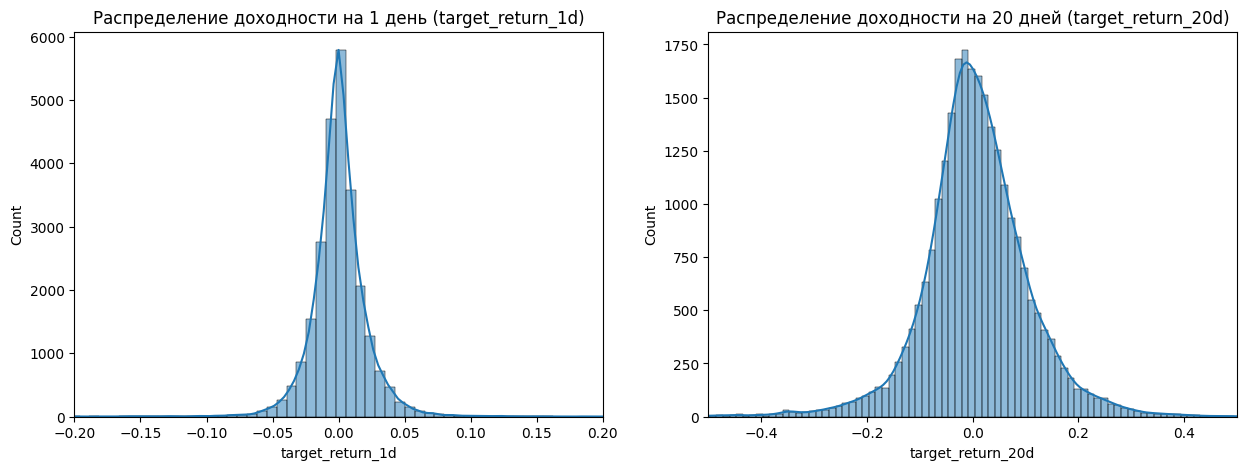

In [2]:
# Выбираем несколько таргетов для анализа: 1-й день, 5-й, 10-й и 20-й
target_cols = ['target_return_1d', 'target_return_5d', 'target_return_10d', 'target_return_20d']

print("\n--- 4. Описательные статистики для целевых переменных ---")
display(df[target_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))

print("\n--- 5. Распределение доходности на 1-й и 20-й день ---")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['target_return_1d'], bins=100, ax=axes[0], kde=True)
axes[0].set_title('Распределение доходности на 1 день (target_return_1d)')
axes[0].set_xlim(-0.2, 0.2) # Ограничим, чтобы рассмотреть основное распределение

sns.histplot(df['target_return_20d'], bins=100, ax=axes[1], kde=True)
axes[1].set_title('Распределение доходности на 20 дней (target_return_20d)')
axes[1].set_xlim(-0.5, 0.5) # Ограничим, чтобы рассмотреть основное распределение
plt.show()


--- 6. Описательные статистики для выборочных признаков ---


,log_return_1d,volatility_20d,rsi_14,macd_hist,volume_vs_sma20,nlp_num_news,nlp_sentiment_positive,nlp_emb_1
count,25562.000000,25562.000000,25562.000000,25562.000000,25562.000000,25562.000000,25562.000000,25562.000000
mean,0.000096,0.019226,51.048466,0.072677,1.024459,0.344926,0.075158,0.027168
std,0.022903,0.012417,13.468258,17.056379,0.671318,1.010058,0.205345,0.125781
min,-0.531944,0.002883,0.000000,-247.029908,0.000180,0.000000,0.000000,-0.652169
25%,-0.009473,0.012510,41.710850,-1.139265,0.638796,0.000000,0.000000,0.000000
50%,0.000000,0.016696,50.632659,0.039238,0.884344,0.000000,0.000000,0.000000
75%,0.009798,0.022168,60.417898,1.337993,1.241333,0.000000,0.000000,0.000000
max,0.287968,0.143349,100.000000,318.910441,18.269147,44.000000,0.994850,1.165574



--- 7. Распределение выборочных признаков ---


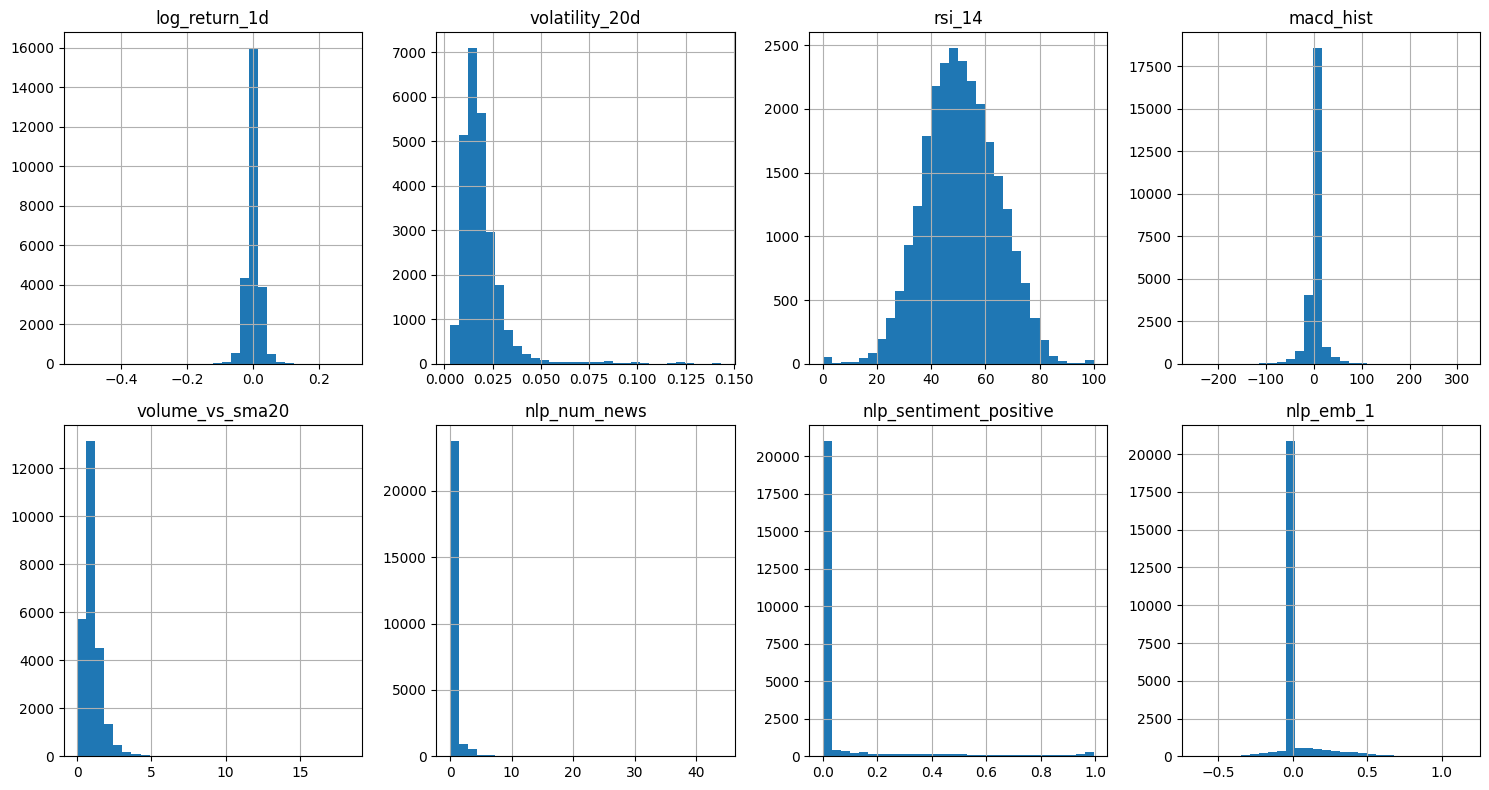

In [3]:
# Выбираем несколько признаков из разных групп
feature_cols = [
    # TS
    'log_return_1d', 'volatility_20d', 'rsi_14', 'macd_hist', 'volume_vs_sma20',
    # NLP
    'nlp_num_news', 'nlp_sentiment_positive', 'nlp_char_count_mean', 'nlp_emb_1'
]
feature_cols = [f for f in feature_cols if f in df.columns]

print("\n--- 6. Описательные статистики для выборочных признаков ---")
display(df[feature_cols].describe())

print("\n--- 7. Распределение выборочных признаков ---")
df[feature_cols].hist(bins=30, figsize=(15, 8), layout=(-1, 4))
plt.tight_layout()
plt.show()


--- 8. Визуализация данных для тикера: SBER ---


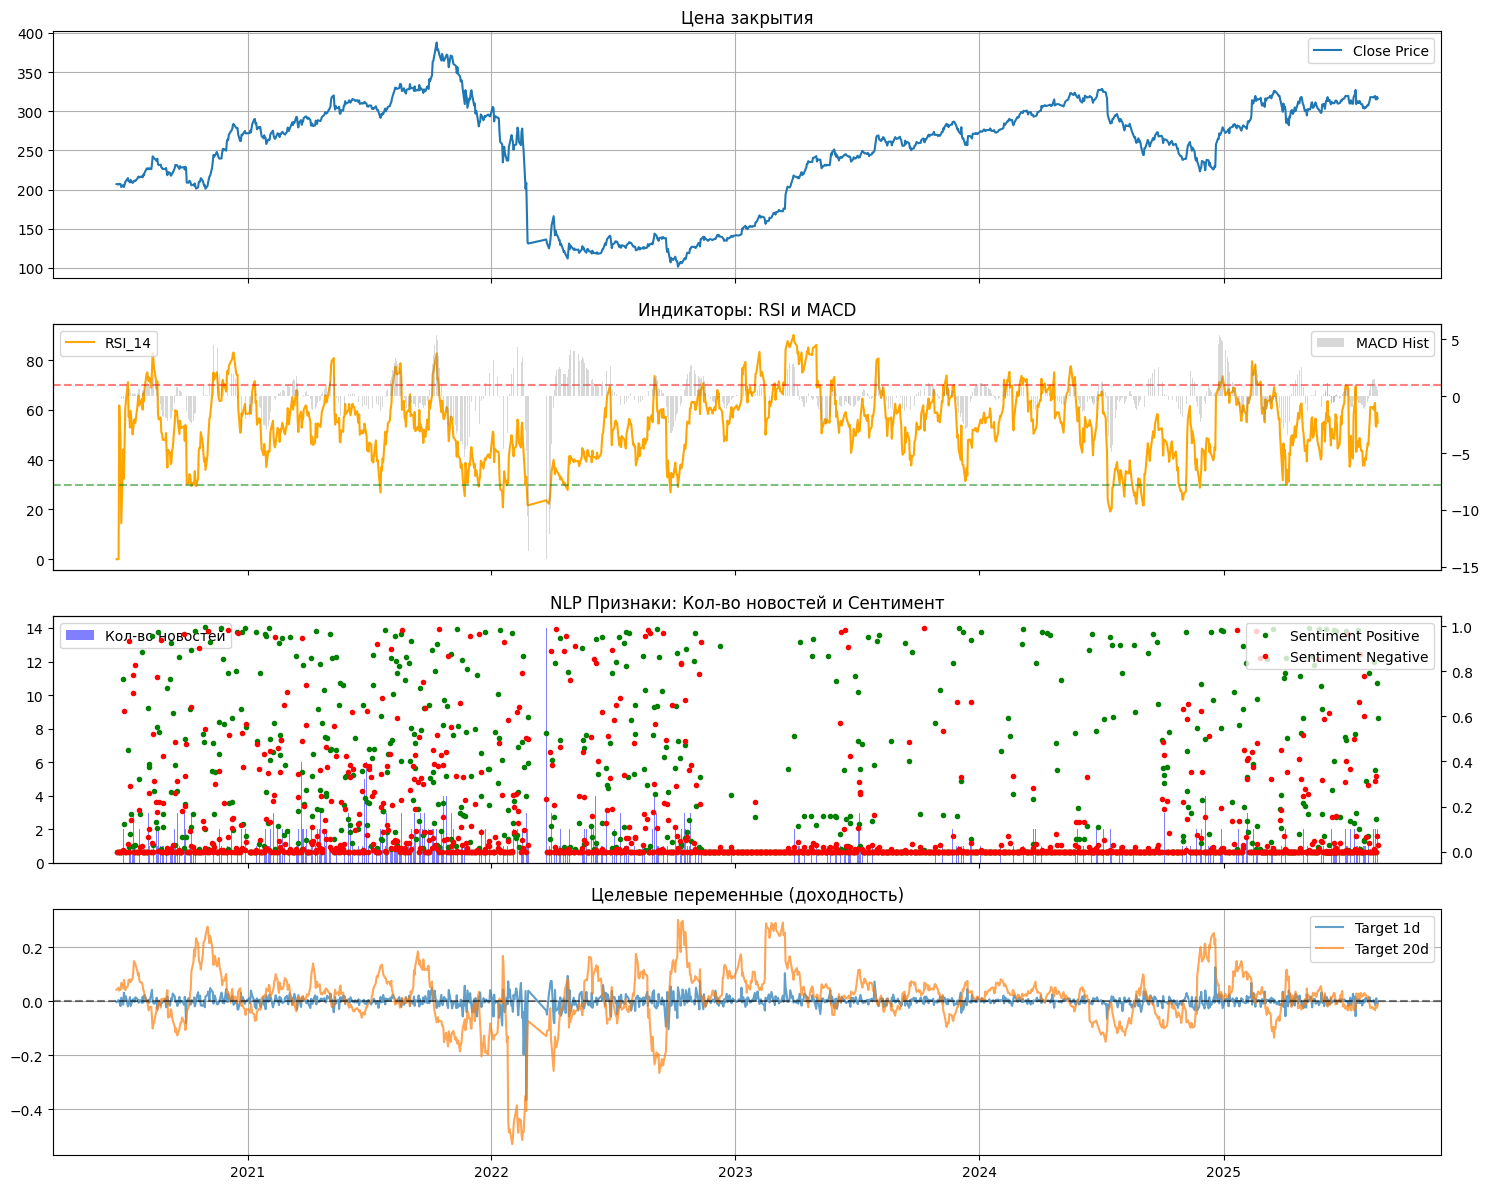

In [4]:
# Выбираем один тикер для примера (например, 'SBER')
ticker_to_plot = 'SBER'
df_ticker = df[df['ticker'] == ticker_to_plot].set_index('date')

if df_ticker.empty:
    print(f"Тикер {ticker_to_plot} не найден, выберите другой.")
else:
    print(f"\n--- 8. Визуализация данных для тикера: {ticker_to_plot} ---")
    
    fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
    
    # 1. Цена закрытия
    axes[0].plot(df_ticker['close'], label='Close Price')
    axes[0].set_title('Цена закрытия')
    axes[0].grid(True)
    axes[0].legend()
    
    # 2. RSI и MACD
    axes[1].plot(df_ticker['rsi_14'], label='RSI_14', color='orange')
    axes[1].axhline(70, color='r', linestyle='--', alpha=0.5)
    axes[1].axhline(30, color='g', linestyle='--', alpha=0.5)
    ax1_twin = axes[1].twinx()
    ax1_twin.bar(df_ticker.index, df_ticker['macd_hist'], label='MACD Hist', color='gray', alpha=0.3)
    axes[1].set_title('Индикаторы: RSI и MACD')
    axes[1].legend(loc='upper left')
    ax1_twin.legend(loc='upper right')

    # 3. NLP признаки
    axes[2].bar(df_ticker.index, df_ticker['nlp_num_news'], label='Кол-во новостей', color='b', alpha=0.5)
    ax2_twin = axes[2].twinx()
    ax2_twin.plot(df_ticker['nlp_sentiment_positive'], label='Sentiment Positive', color='g', marker='.', linestyle='none')
    ax2_twin.plot(df_ticker['nlp_sentiment_negative'], label='Sentiment Negative', color='r', marker='.', linestyle='none')
    axes[2].set_title('NLP Признаки: Кол-во новостей и Сентимент')
    axes[2].legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    
    # 4. Таргет
    axes[3].plot(df_ticker['target_return_1d'], label='Target 1d', alpha=0.7)
    axes[3].plot(df_ticker['target_return_20d'], label='Target 20d', alpha=0.7)
    axes[3].axhline(0, color='k', linestyle='--', alpha=0.5)
    axes[3].set_title('Целевые переменные (доходность)')
    axes[3].grid(True)
    axes[3].legend()

    plt.tight_layout()
    plt.show()

In [5]:
days_with_news = df[df['nlp_num_news'] > 0]
days_without_news = df[df['nlp_num_news'] == 0]

total_days = len(df)
num_days_with_news = len(days_with_news)
num_days_without_news = len(days_without_news)

percent_without_news = (num_days_without_news / total_days) * 100

print(f"--- Анализ наличия новостей ---")
print(f"Всего записей (торговых дней * тикеров): {total_days}")
print(f"Из них дней С новостями: {num_days_with_news}")
print(f"Из них дней БЕЗ новостей: {num_days_without_news}")
print(f"\nДоля дней без новостей: {percent_without_news:.2f}%")

--- Анализ наличия новостей ---
Всего записей (торговых дней * тикеров): 25562
Из них дней С новостями: 5092
Из них дней БЕЗ новостей: 20470

Доля дней без новостей: 80.08%


In [6]:
# Выбираем те же NLP-признаки для сравнения
nlp_feature_cols = [
    'nlp_num_news', 'nlp_sentiment_positive', 'nlp_sentiment_neutral', 'nlp_sentiment_negative',
    'nlp_char_count_mean', 'nlp_emb_1' # Возьмем один эмбеддинг для примера
]
nlp_feature_cols = [f for f in nlp_feature_cols if f in df.columns]

print("\n--- Статистики для дней БЕЗ новостей (должны быть нули) ---")
display(days_without_news[nlp_feature_cols].describe())

print("\n--- Статистики для дней С новостями (должны быть осмысленные значения) ---")
display(days_with_news[nlp_feature_cols].describe())


--- Статистики для дней БЕЗ новостей (должны быть нули) ---


,nlp_num_news,nlp_sentiment_positive,nlp_sentiment_neutral,nlp_sentiment_negative,nlp_emb_1
count,20470.0,20470.0,20470.0,20470.0,20470.0
mean,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0



--- Статистики для дней С новостями (должны быть осмысленные значения) ---


,nlp_num_news,nlp_sentiment_positive,nlp_sentiment_neutral,nlp_sentiment_negative,nlp_emb_1
count,5092.00000,5092.000000,5092.000000,5092.000000,5092.000000
mean,1.73154,0.377297,0.872990,0.262869,0.136382
std,1.64951,0.312558,0.114752,0.280179,0.254038
min,1.00000,0.004263,0.092044,0.002668,-0.652169
25%,1.00000,0.089901,0.830742,0.030907,-0.033299
50%,1.00000,0.311592,0.907410,0.155464,0.122716
75%,2.00000,0.603649,0.952938,0.417697,0.301715
max,44.00000,0.994850,0.993056,0.996127,1.165574


In [1]:
%pip install git+https://github.com/IBM/tsfm.git

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
from tsfm_public.toolkit.dataset import ForecastDFDataset
help(ForecastDFDataset)

c:\Users\iboro\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Help on class ForecastDFDataset in module tsfm_public.toolkit.dataset:

class ForecastDFDataset(BaseConcatDFDataset)
 |  ForecastDFDataset(data: pandas.core.frame.DataFrame, id_columns: List[str] = [], timestamp_column: Optional[str] = None, target_columns: List[str] = [], observable_columns: List[str] = [], control_columns: List[str] = [], conditional_columns: List[str] = [], categorical_columns: List[str] = [], static_categorical_columns: List[str] = [], context_length: int = 1, prediction_length: int = 1, num_workers: int = 1, frequency_token: Optional[int] = None, autoregressive_modeling: bool = True, stride: int = 1, fill_value: Union[float, int] = 0.0, masking_specification: Optional[List[Tuple[str, Union[int, Tuple[int, int]]]]] = None, enable_padding: bool = True, metadata_columns: List[str] = [], impute_method: Optional[str] = None)
 |  
 |  A dataset used for forecasting pretraing and inference
 |  
 |  Args:
 |      data (pd.DataFrame): Underlying pandas dataframe.
 |      i

In [1]:
import pandas as pd

# Загружаем исходный датасет
df = pd.read_parquet("final_train_data.parquet")

# Проверяем наличие нужных колонок
assert "ticker" in df.columns, "В датафрейме отсутствует колонка 'ticker'"
assert "date" in df.columns, "В датафрейме отсутствует колонка 'date'"

# Преобразуем дату в datetime
df["date"] = pd.to_datetime(df["date"])

# Сортируем для корректного выбора последних дней
df = df.sort_values(["ticker", "date"])

# Определяем последние 20 дат для каждого тикера
def last_n_days(group, n=20):
    # Берём уникальные даты для конкретного тикера
    unique_dates = group["date"].drop_duplicates().sort_values()
    # Берём последние n уникальных дат
    last_dates = unique_dates.tail(n)
    # Возвращаем строки, соответствующие этим датам
    return group[group["date"].isin(last_dates)]

# Применяем функцию к каждой группе
last_20_days_df = df.groupby("ticker", group_keys=False).apply(last_n_days, n=20)

# Сортируем для наглядности
last_20_days_df = last_20_days_df.sort_values(["ticker", "date"]).reset_index(drop=True)

# Выводим результат
print(f"Получено {len(last_20_days_df)} строк для {last_20_days_df['ticker'].nunique()} тикеров.")
display(last_20_days_df)

Получено 380 строк для 19 тикеров.


C:\Users\iboro\AppData\Local\Temp\ipykernel_3200\1007145791.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_20_days_df = df.groupby("ticker", group_keys=False).apply(last_n_days, n=20)


,open,close,high,low,volume,date,ticker,day_of_week,week_of_year,month,...,target_return_11d,target_return_12d,target_return_13d,target_return_14d,target_return_15d,target_return_16d,target_return_17d,target_return_18d,target_return_19d,target_return_20d
0,58.86,58.91,58.94,58.74,307270,2025-07-27,AFLT,6,30,7,...,0.111696,0.151757,0.156680,0.159056,0.175861,0.141572,0.141572,0.167883,0.142930,0.117977
1,58.92,56.53,59.05,55.70,110422980,2025-07-28,AFLT,0,31,7,...,0.200248,0.205378,0.207854,0.225367,0.189634,0.189634,0.217053,0.191049,0.165045,0.120113
2,56.59,57.07,57.95,56.08,58364970,2025-07-29,AFLT,1,31,7,...,0.193972,0.196425,0.213773,0.178377,0.178377,0.205537,0.179779,0.154021,0.109515,0.111793
3,57.10,56.88,57.67,56.54,33652040,2025-07-30,AFLT,2,31,7,...,0.200422,0.217827,0.182314,0.182314,0.209564,0.183720,0.157876,0.113221,0.115506,0.114627
4,56.90,56.98,57.24,56.34,20422220,2025-07-31,AFLT,3,31,7,...,0.215690,0.180239,0.180239,0.207441,0.181643,0.155844,0.111267,0.113549,0.112671,0.104247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,80.40,80.28,80.68,79.65,40097115,2025-08-15,VTBR,4,33,8,...,-0.048331,-0.046462,-0.054559,-0.063901,-0.065272,-0.064026,-0.068386,-0.077977,-0.064150,-0.056552
376,79.10,79.00,79.37,78.00,16548345,2025-08-16,VTBR,5,33,8,...,-0.031013,-0.039241,-0.048734,-0.050127,-0.048861,-0.053291,-0.063038,-0.048987,-0.041266,-0.044304
377,79.19,78.88,79.34,78.80,4592854,2025-08-17,VTBR,6,33,8,...,-0.037779,-0.047287,-0.048682,-0.047414,-0.051851,-0.061613,-0.047541,-0.039807,-0.042850,-0.041075
378,79.09,80.10,80.80,78.71,48411896,2025-08-18,VTBR,0,34,8,...,-0.061798,-0.063171,-0.061923,-0.066292,-0.075905,-0.062047,-0.054432,-0.057428,-0.055680,-0.055181


In [2]:
last_20_days_df.to_parquet("candles_2.parquet", index=False)